# Explore here

Paso 1: Definición del problema
El precio de una acción, un bono, un fondo mutuo y en general, cualquier valor transado en bolsa depende en alguna medida las variables macroeconómicas y de indicadores específicos de cada sector económico, hasta ahora todos estos elementos se pueden medir con relativa certeza, pero el precio también depende de las expectativas del mercado, estas expectativas se traducen en un premio o castigo, dependiendo de la información que se tenga, por ejemplo, proyectos futuros, nuevos productos, demandas, fusiones, adquisiciones, entre otros. Por lo tanto, tenemos el desafío de predecir con un cierto nivel de confianza el precio de un valor en el mercado.

Dicho lo anterior, nuestro desafío será poder predecir el precio del Vanguard Total Stock Market Index Fund ETF (VTI) utilizando modelos de regresión multivariable y también de redes neuronales.

Paso 2: Obtencion y carga del conjunto de datos

In [1]:
import requests
import pandas as pd

# URL 
url_fed = "https://api.stlouisfed.org/fred/series/observations?series_id&api_key&file_type"


# Parámetros de la solicitud
parametros_fed = {
    "series_id":"CPIAUCSL",
    "api_key":"16dbd1bdceb90ffd932425b7e5c279fd",  
    "file_type":"json" 
}

def api_fed(url, parametros, realtime_start, realtime_end):

# Añadir fechas de busqueda 
    parametros["realtime_start"] = realtime_start
    parametros["realtime_end"] = realtime_end


# Realizar la solicitud GET
    response = requests.get(url, params=parametros)

    print(url)

# Verificar si la solicitud fue exitosa
    if response.status_code == 200:
    # Convertir la respuesta a formato JSON
        data = response.json()
    # Retorna la data 
        return data
    else:
        print(f"Error en la solicitud: {response.status_code}")


data = api_fed(url_fed,parametros_fed, "2021-01-01", "2024-11-08")

data_CPIAUCSL = pd.DataFrame(data)

data_CPIAUCSL.head(2)


/Users/eleinybellomanzo/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


https://api.stlouisfed.org/fred/series/observations?series_id&api_key&file_type


,realtime_start,realtime_end,observation_start,observation_end,units,output_type,file_type,order_by,sort_order,count,offset,limit,observations
0,2021-01-01,2024-11-08,1600-01-01,9999-12-31,lin,1,json,observation_date,asc,1173,0,100000,"{'realtime_start': '2021-01-01', 'realtime_end..."
1,2021-01-01,2024-11-08,1600-01-01,9999-12-31,lin,1,json,observation_date,asc,1173,0,100000,"{'realtime_start': '2021-01-01', 'realtime_end..."


In [2]:
data_CPIAUCSL.columns

Index(['realtime_start', 'realtime_end', 'observation_start',
       'observation_end', 'units', 'output_type', 'file_type', 'order_by',
       'sort_order', 'count', 'offset', 'limit', 'observations'],
      dtype='object')

In [3]:
def obtener_observation_fed(data_CPIAUCSL):
    # Convertir la columna "observations" que contiene JSON en un DataFrame
    observations_data = pd.json_normalize(data_CPIAUCSL["observations"])
    
    # Concatenar el DataFrame original con el nuevo DataFrame de las observaciones
    data_CPIAUCSL = pd.concat([data_CPIAUCSL.drop(columns=["observations"]), observations_data], axis=1)

    return data_CPIAUCSL

# Ejecutar la función para obtener los datos procesados
data_CPIAUCSL = obtener_observation_fed(data_CPIAUCSL)

def guardar_csv(data , url_archivo):
    data.to_csv(url_archivo, index= True)




In [4]:
#data_fed_cpi.head(10)
data_CPIAUCSL.tail(2)

,realtime_start,realtime_end,observation_start,observation_end,units,output_type,file_type,order_by,sort_order,count,offset,limit,realtime_start,realtime_end,date,value
1171,2021-01-01,2024-11-08,1600-01-01,9999-12-31,lin,1,json,observation_date,asc,1173,0,100000,2024-09-11,2024-11-08,2024-08-01,314.121
1172,2021-01-01,2024-11-08,1600-01-01,9999-12-31,lin,1,json,observation_date,asc,1173,0,100000,2024-10-10,2024-11-08,2024-09-01,314.686


In [5]:
guardar_csv(data_CPIAUCSL , "../data/raw/fed_CPIAUCSL_historical_data.csv")

Producto interno bruto='GNP"
Api_key='b55d1a0787bb20a7fcc6aef921343008'

In [6]:
# URL 
url_fed = "https://api.stlouisfed.org/fred/series/observations?series_id&api_key&file_type"


# Parámetros de la solicitud
parametros_fed = {
    "series_id": "GNP",
    "api_key": "b55d1a0787bb20a7fcc6aef921343008",  
    "file_type": "json" 
}

data = api_fed(url_fed,parametros_fed, "2021-01-01", "2024-11-08")

data_GNP = pd.DataFrame(data)

data_GNP.head(2)


https://api.stlouisfed.org/fred/series/observations?series_id&api_key&file_type


,realtime_start,realtime_end,observation_start,observation_end,units,output_type,file_type,order_by,sort_order,count,offset,limit,observations
0,2021-01-01,2024-11-08,1600-01-01,9999-12-31,lin,1,json,observation_date,asc,538,0,100000,"{'realtime_start': '2021-01-01', 'realtime_end..."
1,2021-01-01,2024-11-08,1600-01-01,9999-12-31,lin,1,json,observation_date,asc,538,0,100000,"{'realtime_start': '2021-01-01', 'realtime_end..."


In [7]:
# Ejecutar la función para obtener los datos procesados
data_GNP = obtener_observation_fed(data_GNP)


In [8]:
#data_GNPCA.head(2)
data_GNP.tail(2)

,realtime_start,realtime_end,observation_start,observation_end,units,output_type,file_type,order_by,sort_order,count,offset,limit,realtime_start,realtime_end,date,value
536,2021-01-01,2024-11-08,1600-01-01,9999-12-31,lin,1,json,observation_date,asc,538,0,100000,2024-08-29,2024-09-25,2024-04-01,28779.676
537,2021-01-01,2024-11-08,1600-01-01,9999-12-31,lin,1,json,observation_date,asc,538,0,100000,2024-09-26,2024-11-08,2024-04-01,29076.614


In [9]:
guardar_csv(data_GNP,"../data/raw/fed_GNP_historical_data.csv")

Tasa de desempleo='UNRATE'
Api_key='8660234b709531d44271bbd9520353dd'

In [10]:
# URL 
url_fed = "https://api.stlouisfed.org/fred/series/observations?api_key&file_type&series_id"


# Parámetros de la solicitud
parametros_fed = {
    "api_key": "8660234b709531d44271bbd9520353dd",  
    "file_type": "json",
    "series_id": "UNRATE"
}

data = api_fed(url_fed,parametros_fed, "2021-01-01", "2024-11-08")

data_UNRATE = pd.DataFrame(data)

data_UNRATE.head(2)


https://api.stlouisfed.org/fred/series/observations?api_key&file_type&series_id


,realtime_start,realtime_end,observation_start,observation_end,units,output_type,file_type,order_by,sort_order,count,offset,limit,observations
0,2021-01-01,2024-11-08,1600-01-01,9999-12-31,lin,1,json,observation_date,asc,974,0,100000,"{'realtime_start': '2021-01-01', 'realtime_end..."
1,2021-01-01,2024-11-08,1600-01-01,9999-12-31,lin,1,json,observation_date,asc,974,0,100000,"{'realtime_start': '2021-01-01', 'realtime_end..."


In [11]:
# Ejecutar la función para obtener los datos procesados
data_UNRATE = obtener_observation_fed(data_UNRATE)

In [12]:
data_UNRATE.tail(2)

,realtime_start,realtime_end,observation_start,observation_end,units,output_type,file_type,order_by,sort_order,count,offset,limit,realtime_start,realtime_end,date,value
972,2021-01-01,2024-11-08,1600-01-01,9999-12-31,lin,1,json,observation_date,asc,974,0,100000,2024-10-04,2024-11-08,2024-09-01,4.1
973,2021-01-01,2024-11-08,1600-01-01,9999-12-31,lin,1,json,observation_date,asc,974,0,100000,2024-11-01,2024-11-08,2024-10-01,4.1


In [13]:
guardar_csv(data_UNRATE,"../data/raw/fed_UNRATE_historical_data.csv")

Federal Funds Effective Rate (DFF)
Tasa de interes='DFF'
Api_key='78f1d1b71351546a936232d4d5469d80'

In [14]:
# URL 
url_fed = "https://api.stlouisfed.org/fred/series/observations?api_key&file_type&series_id"


# Parámetros de la solicitud
parametros_fed = {
    "api_key": "78f1d1b71351546a936232d4d5469d80",  
    "file_type": "json",
    "series_id": "DFF"
}

data = api_fed(url_fed,parametros_fed, "2021-01-01", "2024-11-08")

data_DFF= pd.DataFrame(data)

data_DFF.head(2)


https://api.stlouisfed.org/fred/series/observations?api_key&file_type&series_id


,realtime_start,realtime_end,observation_start,observation_end,units,output_type,file_type,order_by,sort_order,count,offset,limit,observations
0,2021-01-01,2024-11-08,1600-01-01,9999-12-31,lin,1,json,observation_date,asc,25698,0,100000,"{'realtime_start': '2021-01-01', 'realtime_end..."
1,2021-01-01,2024-11-08,1600-01-01,9999-12-31,lin,1,json,observation_date,asc,25698,0,100000,"{'realtime_start': '2021-01-01', 'realtime_end..."


In [15]:
# Ejecutar la función para obtener los datos procesados
data_DFF = obtener_observation_fed(data_DFF)

In [16]:
data_DFF.tail(2)

,realtime_start,realtime_end,observation_start,observation_end,units,output_type,file_type,order_by,sort_order,count,offset,limit,realtime_start,realtime_end,date,value
25696,2021-01-01,2024-11-08,1600-01-01,9999-12-31,lin,1,json,observation_date,asc,25698,0,100000,2024-11-07,2024-11-08,2024-11-06,4.83
25697,2021-01-01,2024-11-08,1600-01-01,9999-12-31,lin,1,json,observation_date,asc,25698,0,100000,2024-11-08,2024-11-08,2024-11-07,4.83


In [17]:
guardar_csv(data_DFF,"../data/raw/fed_DFF_historical_data.csv")

Trade Balance: Goods and Services, Balance of Payments Basis (BOPGSTB)
BC ='BOPGSTB'
Api_key='58f82a464f9ab2bc239793f7ebb937f7'

In [18]:
# URL 
url_fed = "https://api.stlouisfed.org/fred/series/observations?api_key&file_type&series_id"


# Parámetros de la solicitud
parametros_fed = {
    "api_key": "58f82a464f9ab2bc239793f7ebb937f7",  
    "file_type": "json",
    "series_id": "BOPGSTB"
}

data = api_fed(url_fed,parametros_fed, "2021-01-01", "2024-11-08")

data_BOPGSTB= pd.DataFrame(data)

data_BOPGSTB.head(2)

https://api.stlouisfed.org/fred/series/observations?api_key&file_type&series_id


,realtime_start,realtime_end,observation_start,observation_end,units,output_type,file_type,order_by,sort_order,count,offset,limit,observations
0,2021-01-01,2024-11-08,1600-01-01,9999-12-31,lin,1,json,observation_date,asc,878,0,100000,"{'realtime_start': '2021-01-01', 'realtime_end..."
1,2021-01-01,2024-11-08,1600-01-01,9999-12-31,lin,1,json,observation_date,asc,878,0,100000,"{'realtime_start': '2021-01-01', 'realtime_end..."


In [19]:
# Ejecutar la función para obtener los datos procesados
data_BOPGSTB = obtener_observation_fed(data_BOPGSTB)

In [20]:
data_BOPGSTB.tail(5)

,realtime_start,realtime_end,observation_start,observation_end,units,output_type,file_type,order_by,sort_order,count,offset,limit,realtime_start,realtime_end,date,value
873,2021-01-01,2024-11-08,1600-01-01,9999-12-31,lin,1,json,observation_date,asc,878,0,100000,2024-09-04,2024-10-07,2024-07-01,-78791.0
874,2021-01-01,2024-11-08,1600-01-01,9999-12-31,lin,1,json,observation_date,asc,878,0,100000,2024-10-08,2024-11-08,2024-07-01,-78918.0
875,2021-01-01,2024-11-08,1600-01-01,9999-12-31,lin,1,json,observation_date,asc,878,0,100000,2024-10-08,2024-11-04,2024-08-01,-70431.0
876,2021-01-01,2024-11-08,1600-01-01,9999-12-31,lin,1,json,observation_date,asc,878,0,100000,2024-11-05,2024-11-08,2024-08-01,-70787.0
877,2021-01-01,2024-11-08,1600-01-01,9999-12-31,lin,1,json,observation_date,asc,878,0,100000,2024-11-05,2024-11-08,2024-09-01,-84359.0


In [21]:
guardar_csv(data_BOPGSTB,"../data/raw/fed_BOPGSTB_historical_data.csv")

Realizar transformaciones en la data para poder utilizarla en el modelo

In [22]:
df_CPIAUCSL = data_CPIAUCSL[['date','value']].copy()
df_CPIAUCSL['date'] = pd.to_datetime(df_CPIAUCSL['date'])
df_CPIAUCSL['value'] = pd.to_numeric(df_CPIAUCSL['value'], errors='coerce')
df_CPIAUCSL['value'] = df_CPIAUCSL['value'].apply(lambda x: x*1000 if x < 500 else x)
df_CPIAUCSL['IPC_value'] = df_CPIAUCSL['value']
df_CPIAUCSL = df_CPIAUCSL.drop('value', axis=1)
df_CPIAUCSL = df_CPIAUCSL.drop_duplicates(subset=['date'], keep='last')
df_CPIAUCSL.set_index('date', inplace=True)

# Cambiar la frecuencia a diaria y rellenar con NaN
df_IPC_D = df_CPIAUCSL.resample('D').asfreq()

# Función personalizada para interpolar el valor y calcular variación diaria
def interpolar_valor(df_CPIAUCSL):
    # Interpolar valores entre meses
    df_interpolado = df_CPIAUCSL.resample('D').interpolate(method='linear')
    
    # Calcular la variación diaria como porcentaje
    df_interpolado['IPC_var'] = df_interpolado['IPC_value'].pct_change().round(5) * 100
    
    return df_interpolado

# Aplicar la función a los datos diarios
df_IPC_D = interpolar_valor(df_CPIAUCSL)

#df_IPC_D = df_IPC_D[(df_IPC_D['date'] >= '2021-01-01') & (df_IPC_D['date'] <= '2023-12-31')]
df_IPC_D

,IPC_value,IPC_var
date,,
1947-01-01,21480.000000,NaN
1947-01-02,21484.516129,0.021
1947-01-03,21489.032258,0.021
1947-01-04,21493.548387,0.021
1947-01-05,21498.064516,0.021
...,...,...
2024-08-28,314613.096774,0.006
2024-08-29,314631.322581,0.006
2024-08-30,314649.548387,0.006


In [23]:
df_BOPGSTBL = data_BOPGSTB[['date','value']].copy()
df_BOPGSTBL['date'] = pd.to_datetime(df_BOPGSTBL['date'])
df_BOPGSTBL['value'] = pd.to_numeric(df_BOPGSTBL['value'], errors='coerce')
df_BOPGSTBL['BC_value'] = df_BOPGSTBL['value'].apply(lambda x: x/100000000000 if x < -200000 else x)
df_BOPGSTBL = df_BOPGSTBL.drop('value', axis=1)
df_BOPGSTBL = df_BOPGSTBL.drop_duplicates(subset=['date'], keep='last')
df_BOPGSTBL.set_index('date', inplace=True)

df_BC_D = df_BOPGSTBL.resample('D').asfreq()
df_BC_D = df_BC_D.resample('D').interpolate(method='linear')
df_BC_D['BC_var'] = df_BC_D['BC_value'].pct_change().round(5) * 100
 
df_BC_D

,BC_value,BC_var
date,,
1992-01-01,-2026.000000,NaN
1992-01-02,-1987.451613,-1.903
1992-01-03,-1948.903226,-1.940
1992-01-04,-1910.354839,-1.978
1992-01-05,-1871.806452,-2.018
...,...,...
2024-08-28,-82607.774194,0.533
2024-08-29,-83045.580645,0.530
2024-08-30,-83483.387097,0.527


In [24]:
df_DFF = data_DFF[['date','value']].copy()

df_DFF['date'] = pd.to_datetime(df_DFF['date'])
df_DFF['value'] = pd.to_numeric(df_DFF['value'], errors='coerce')
df_DFF['TPM_value'] = df_DFF['value']
df_DFF['TPM_var'] = df_DFF['value'].pct_change().round(5) * 100
df_DFF = df_DFF.drop('value', axis=1)
df_DFF = df_DFF.drop_duplicates(subset=['date'], keep='last')
df_DFF.set_index('date', inplace=True)

df_DFF

,TPM_value,TPM_var
date,,
1954-07-01,1.13,NaN
1954-07-02,1.25,10.619
1954-07-03,1.25,0.000
1954-07-04,1.25,0.000
1954-07-05,0.88,-29.600
...,...,...
2024-11-03,4.83,0.000
2024-11-04,4.83,0.000
2024-11-05,4.83,0.000


In [25]:
df_GNP = data_GNP[['date','value']].copy()
df_GNP['date'] = pd.to_datetime(df_GNP['date'])
df_GNP['value'] = pd.to_numeric(df_GNP['value'], errors='coerce')
df_GNP['PIB_value'] = df_GNP['value'].apply(lambda x: x*1000 if x < 30000 else x)
df_GNP = df_GNP.drop('value', axis=1)
df_GNP = df_GNP.drop_duplicates(subset=['date'], keep='last')
df_GNP.set_index('date', inplace=True)

df_PIB_D = df_GNP.resample('D').asfreq()
df_PIB_D = df_PIB_D.resample('D').interpolate(method='linear')
df_PIB_D['PIB_var'] = df_PIB_D['PIB_value'].pct_change().round(5) * 100

df_PIB_D

,PIB_value,PIB_var
date,,
1939-01-01,NaN,NaN
1939-01-02,NaN,NaN
1939-01-03,NaN,NaN
1939-01-04,NaN,NaN
1939-01-05,NaN,NaN
...,...,...
2024-03-28,2.906033e+07,0.014
2024-03-29,2.906440e+07,0.014
2024-03-30,2.906847e+07,0.014


In [26]:
df_UNRATE = data_UNRATE[['date','value']].copy()
df_UNRATE['date'] = pd.to_datetime(df_UNRATE['date'])
df_UNRATE['value'] = pd.to_numeric(df_UNRATE['value'], errors='coerce')
df_UNRATE['TDES_value'] = df_UNRATE['value']
df_UNRATE = df_UNRATE.drop('value', axis=1)
df_UNRATE = df_UNRATE.drop_duplicates(subset=['date'], keep='last')
df_UNRATE.set_index('date', inplace=True)
df_TDES_D = df_UNRATE.resample('D').asfreq()
df_TDES_D = df_TDES_D.resample('D').interpolate(method='linear')
df_TDES_D['TDES_var'] = df_TDES_D['TDES_value'].pct_change().round(5) * 100

df_TDES_D

,TDES_value,TDES_var
date,,
1948-01-01,3.400000,NaN
1948-01-02,3.412903,0.380
1948-01-03,3.425806,0.378
1948-01-04,3.438710,0.377
1948-01-05,3.451613,0.375
...,...,...
2024-09-27,4.100000,0.000
2024-09-28,4.100000,0.000
2024-09-29,4.100000,0.000


In [27]:
#guardar los dataframe en formato csv
guardar_csv(df_BC_D,"../data/processed/df_balanzacomercial_diario.csv")
guardar_csv(df_IPC_D,"../data/processed/df_indicepreciosconsumidor_diario.csv")
guardar_csv(df_DFF,"../data/processed/df_tasainteres_diario.csv")
guardar_csv(df_PIB_D,"../data/processed/df_productointernobruto_diario.csv")
guardar_csv(df_TDES_D,"../data/processed/df_tasadesempleo_diario.csv")

### Obtención de información para el valor del VIT index

In [28]:
import requests
import csv
import json
from datetime import datetime, timedelta

# API Key de Polygon.io
key_activos = '2T0PMe4qTXopT2r7lymhHfrBvMNhx6VI'

# Símbolos de los activos
activos = {      
    'VTI': 'VTI',          
    'Oro': 'C:XAUUSD',       
    'Bitcoin': 'X:BTCUSD'    
}

# Función para consultar datos históricos de un activo
def api_activos(key_activos, activo, timespan='day', start_date=None, end_date=None):
    # URL de la API para obtener los datos históricos
    url = f'https://api.polygon.io/v2/aggs/ticker/{activo}/range/1/{timespan}/{start_date}/{end_date}?adjusted=true&sort=asc&apiKey={key_activos}'
    
    # Hacer la solicitud GET a la API de Polygon.io
    response = requests.get(url)
    print(url)

    # Verificar si la solicitud fue exitosa
    if response.status_code == 200:
        # Convertir la respuesta a formato JSON
        data = response.json()
        print ("bien")

        if 'results' in data:
            return data['results']  # Devolver solo los resultados
        else:
            print("No se encontraron resultados en la respuesta.")
            return []
    else:
        print(f"Error en la solicitud: {response.status_code}")
        return []


# Llamar a la función para cada activo y guardar los datos en archivos CSV separados

# Obtener y guardar datos del VTI
historical_data_vti = api_activos(key_activos, activos['VTI'], 'day', "2021-01-01", "2024-11-08")
vti = pd.DataFrame(historical_data_vti)
guardar_csv(vti, '../data/VTI_historical_data.csv')




https://api.polygon.io/v2/aggs/ticker/VTI/range/1/day/2021-01-01/2024-11-08?adjusted=true&sort=asc&apiKey=2T0PMe4qTXopT2r7lymhHfrBvMNhx6VI
bien


In [29]:

# convertir a fecha 

vti['t'] = pd.to_datetime(vti['t'], unit='ms').dt.strftime('%Y-%m-%d')
vti

,v,vw,o,c,h,l,t,n
0,4248218.0,199.7847,199.26,198.35,200.920,198.2100,2022-11-14,72199
1,4605700.0,200.6384,201.50,200.36,202.140,198.3400,2022-11-15,74446
2,2904962.0,198.6937,199.45,198.32,199.720,198.0300,2022-11-16,58235
3,3705403.0,196.8776,195.67,197.49,197.895,195.4500,2022-11-17,62114
4,3039298.0,197.9824,199.08,198.42,199.410,196.9000,2022-11-18,53567
...,...,...,...,...,...,...,...,...
495,2383851.0,282.1086,282.17,281.72,283.070,280.8650,2024-11-04,68707
496,2056304.0,284.1608,282.11,285.30,285.300,282.0100,2024-11-05,46980
497,5668856.0,292.1445,292.30,293.28,293.610,290.2100,2024-11-06,90681
498,4095995.0,294.9238,294.02,295.33,295.900,294.0100,2024-11-07,75094


In [30]:
vti.drop(['v', 'vw', 'o', 'h', 'l', 'n'], axis = 1, inplace = True)


In [31]:
vti

,c,t
0,198.35,2022-11-14
1,200.36,2022-11-15
2,198.32,2022-11-16
3,197.49,2022-11-17
4,198.42,2022-11-18
...,...,...
495,281.72,2024-11-04
496,285.30,2024-11-05
497,293.28,2024-11-06
498,295.33,2024-11-07


In [32]:
vti

,c,t
0,198.35,2022-11-14
1,200.36,2022-11-15
2,198.32,2022-11-16
3,197.49,2022-11-17
4,198.42,2022-11-18
...,...,...
495,281.72,2024-11-04
496,285.30,2024-11-05
497,293.28,2024-11-06
498,295.33,2024-11-07


In [33]:
vti = vti.rename(columns = {'c' : 'VTI_value'})
vti = vti.rename(columns = {'t' : 'date'})



In [34]:
# Calcular el valor del VTI cinco días antes y añadirlo al DataFrame

vti['VTI_6_days_ago'] = vti['VTI_value'].shift(6)

In [35]:
vti['pct_change_6d'] = vti['VTI_6_days_ago'].pct_change(6) * 100

In [36]:
vti = vti.set_index("date")

vti

,VTI_value,VTI_6_days_ago,pct_change_6d
date,,,
2022-11-14,198.35,NaN,NaN
2022-11-15,200.36,NaN,NaN
2022-11-16,198.32,NaN,NaN
2022-11-17,197.49,NaN,NaN
2022-11-18,198.42,NaN,NaN
...,...,...,...
2024-11-04,281.72,285.54,-0.771476
2024-11-05,285.30,286.70,-0.758074
2024-11-06,293.28,287.08,-0.312522


In [37]:
# Crear un rango de fechas para el índice
fecha_inicio = '2022-12-01'
fecha_fin = '2024-11-08'

rango_fechas = pd.date_range(start=fecha_inicio, end=fecha_fin, freq='D')


# Crear el DataFrame base con el índice de fechas
df_indicadores_D = pd.DataFrame(index=rango_fechas)

# Llenar el DataFrame base con datos de otros DataFrames
df_indicadores_D = df_indicadores_D.join(df_DFF, how='left')
df_indicadores_D = df_indicadores_D.join(df_TDES_D, how='left')
df_indicadores_D = df_indicadores_D.join(df_IPC_D, how='left')
df_indicadores_D = df_indicadores_D.join(df_PIB_D, how='left')
df_indicadores_D = df_indicadores_D.join(df_BC_D, how='left')

df_indicadores_D.fillna(method='ffill', inplace=True)

df_indicadores_D

/var/folders/kx/8g62626j79g8v6fkbl1h0cxm0000gn/T/ipykernel_5497/2504329864.py:18: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_indicadores_D.fillna(method='ffill', inplace=True)


,TPM_value,TPM_var,TDES_value,TDES_var,IPC_value,IPC_var,PIB_value,PIB_var,BC_value,BC_var
2022-12-01,3.83,0.0,3.500000,-0.095,298812.000000,0.002,2.713360e+07,0.016,-70762.000000,0.388
2022-12-02,3.83,0.0,3.496774,-0.092,298861.806452,0.017,2.713782e+07,0.016,-70736.129032,-0.037
2022-12-03,3.83,0.0,3.493548,-0.092,298911.612903,0.017,2.714204e+07,0.016,-70710.258065,-0.037
2022-12-04,3.83,0.0,3.490323,-0.092,298961.419355,0.017,2.714626e+07,0.016,-70684.387097,-0.037
2022-12-05,3.83,0.0,3.487097,-0.092,299011.225806,0.017,2.715048e+07,0.016,-70658.516129,-0.037
...,...,...,...,...,...,...,...,...,...,...
2024-11-04,4.83,0.0,4.100000,0.000,314686.000000,0.006,2.907661e+07,0.014,-84359.000000,0.522
2024-11-05,4.83,0.0,4.100000,0.000,314686.000000,0.006,2.907661e+07,0.014,-84359.000000,0.522
2024-11-06,4.83,0.0,4.100000,0.000,314686.000000,0.006,2.907661e+07,0.014,-84359.000000,0.522
2024-11-07,4.83,0.0,4.100000,0.000,314686.000000,0.006,2.907661e+07,0.014,-84359.000000,0.522


In [38]:
df_indicadores_D.index= pd.to_datetime(df_indicadores_D.index, unit='ms').strftime('%Y-%m-%d')

In [39]:
df_indicadores_D = df_indicadores_D.join(vti, how = 'left')

df_indicadores_D

,TPM_value,TPM_var,TDES_value,TDES_var,IPC_value,IPC_var,PIB_value,PIB_var,BC_value,BC_var,VTI_value,VTI_6_days_ago,pct_change_6d
2022-12-01,3.83,0.0,3.500000,-0.095,298812.000000,0.002,2.713360e+07,0.016,-70762.000000,0.388,204.18,200.17,0.917570
2022-12-02,3.83,0.0,3.496774,-0.092,298861.806452,0.017,2.713782e+07,0.016,-70736.129032,-0.037,203.99,201.39,0.514075
2022-12-03,3.83,0.0,3.493548,-0.092,298911.612903,0.017,2.714204e+07,0.016,-70710.258065,-0.037,NaN,NaN,NaN
2022-12-04,3.83,0.0,3.490323,-0.092,298961.419355,0.017,2.714626e+07,0.016,-70684.387097,-0.037,NaN,NaN,NaN
2022-12-05,3.83,0.0,3.487097,-0.092,299011.225806,0.017,2.715048e+07,0.016,-70658.516129,-0.037,199.98,201.54,1.623639
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-11-04,4.83,0.0,4.100000,0.000,314686.000000,0.006,2.907661e+07,0.014,-84359.000000,0.522,281.72,285.54,-0.771476
2024-11-05,4.83,0.0,4.100000,0.000,314686.000000,0.006,2.907661e+07,0.014,-84359.000000,0.522,285.30,286.70,-0.758074
2024-11-06,4.83,0.0,4.100000,0.000,314686.000000,0.006,2.907661e+07,0.014,-84359.000000,0.522,293.28,287.08,-0.312522
2024-11-07,4.83,0.0,4.100000,0.000,314686.000000,0.006,2.907661e+07,0.014,-84359.000000,0.522,295.33,286.37,-0.444985


In [40]:
df_indicadores_D = df_indicadores_D [['VTI_value', 'VTI_6_days_ago', 'pct_change_6d', 'TPM_value', 'TPM_var','TDES_value', 'TDES_var', 'IPC_value', 'IPC_var', 'PIB_value', 'PIB_var', 'BC_value', 'BC_var']]

df_indicadores_D

,VTI_value,VTI_6_days_ago,pct_change_6d,TPM_value,TPM_var,TDES_value,TDES_var,IPC_value,IPC_var,PIB_value,PIB_var,BC_value,BC_var
2022-12-01,204.18,200.17,0.917570,3.83,0.0,3.500000,-0.095,298812.000000,0.002,2.713360e+07,0.016,-70762.000000,0.388
2022-12-02,203.99,201.39,0.514075,3.83,0.0,3.496774,-0.092,298861.806452,0.017,2.713782e+07,0.016,-70736.129032,-0.037
2022-12-03,NaN,NaN,NaN,3.83,0.0,3.493548,-0.092,298911.612903,0.017,2.714204e+07,0.016,-70710.258065,-0.037
2022-12-04,NaN,NaN,NaN,3.83,0.0,3.490323,-0.092,298961.419355,0.017,2.714626e+07,0.016,-70684.387097,-0.037
2022-12-05,199.98,201.54,1.623639,3.83,0.0,3.487097,-0.092,299011.225806,0.017,2.715048e+07,0.016,-70658.516129,-0.037
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-11-04,281.72,285.54,-0.771476,4.83,0.0,4.100000,0.000,314686.000000,0.006,2.907661e+07,0.014,-84359.000000,0.522
2024-11-05,285.30,286.70,-0.758074,4.83,0.0,4.100000,0.000,314686.000000,0.006,2.907661e+07,0.014,-84359.000000,0.522
2024-11-06,293.28,287.08,-0.312522,4.83,0.0,4.100000,0.000,314686.000000,0.006,2.907661e+07,0.014,-84359.000000,0.522
2024-11-07,295.33,286.37,-0.444985,4.83,0.0,4.100000,0.000,314686.000000,0.006,2.907661e+07,0.014,-84359.000000,0.522


In [41]:
# Eliminar filas donde 'columna_objetivo' es NaN
df_indicadores_D = df_indicadores_D.dropna(subset=['VTI_value'])
# Reemplazar NaN con el valor anterior en cada columna

df_indicadores_D = df_indicadores_D.ffill()
df_indicadores_D.info()

<class 'pandas.core.frame.DataFrame'>
Index: 488 entries, 2022-12-01 to 2024-11-08
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   VTI_value       488 non-null    float64
 1   VTI_6_days_ago  488 non-null    float64
 2   pct_change_6d   488 non-null    float64
 3   TPM_value       488 non-null    float64
 4   TPM_var         488 non-null    float64
 5   TDES_value      488 non-null    float64
 6   TDES_var        488 non-null    float64
 7   IPC_value       488 non-null    float64
 8   IPC_var         488 non-null    float64
 9   PIB_value       488 non-null    float64
 10  PIB_var         488 non-null    float64
 11  BC_value        488 non-null    float64
 12  BC_var          488 non-null    float64
dtypes: float64(13)
memory usage: 53.4+ KB


Paso 3: Almacenar la información

In [42]:
import sqlite3
#Crear base de datos en sql
conexion_VTI_index= sqlite3.connect("../data/database/Proyecto_Data_Science_VTIindex.db")
#Transformar los dataframe en formato sql
df_BC_D.to_sql('Balanza_comercial',conexion_VTI_index,if_exists='replace',index=True)
df_DFF.to_sql('Tasa_politica_monetaria',conexion_VTI_index,if_exists='replace',index=True)
df_PIB_D.to_sql('Producto_interno_bruto',conexion_VTI_index,if_exists='replace',index=True)
df_TDES_D.to_sql('Tasa_desempleo',conexion_VTI_index,if_exists='replace',index=True)
df_IPC_D.to_sql('Indice_precios_consumidor',conexion_VTI_index,if_exists='replace',index=True)
vti.to_sql('Vti_price',conexion_VTI_index,if_exists='replace',index=True)
#Crear una sola tabla
query_vti_index = """
    SELECT *
    FROM Vti_price
"""
df_vti_value = pd.read_sql_query(query_vti_index,conexion_VTI_index)
conexion_VTI_index.close()

df_vti_value.head()

,date,VTI_value,VTI_6_days_ago,pct_change_6d
0,2022-11-14,198.35,NaN,NaN
1,2022-11-15,200.36,NaN,NaN
2,2022-11-16,198.32,NaN,NaN
3,2022-11-17,197.49,NaN,NaN
4,2022-11-18,198.42,NaN,NaN


Paso 4: Realiza un análisis descriptivo

In [43]:
# Describir la data
df_indicadores_D.describe()

,VTI_value,VTI_6_days_ago,pct_change_6d,TPM_value,TPM_var,TDES_value,TDES_var,IPC_value,IPC_var,PIB_value,PIB_var,BC_value,BC_var
count,488.000000,488.000000,488.000000,488.000000,488.000000,488.000000,488.000000,488.000000,488.00000,4.880000e+02,488.000000,488.000000,488.000000
mean,234.553279,233.464795,0.468383,5.084201,0.051244,3.806513,0.021287,308491.905730,0.00790,2.842265e+07,0.014098,-70087.089126,0.078100
std,28.926463,28.508168,2.021425,0.363662,0.873781,0.245128,0.116720,4885.334969,0.00487,6.471961e+05,0.002486,6748.596955,0.294695
min,188.220000,188.220000,-5.457582,3.830000,-9.381000,3.403226,-0.102000,298812.000000,-0.00200,2.713360e+07,0.012000,-84359.000000,-0.600000
25%,207.885000,206.887500,-0.699275,4.830000,0.000000,3.600000,-0.087000,303941.258065,0.00500,2.788338e+07,0.012000,-74364.145161,-0.062000
50%,226.290000,225.320000,0.628179,5.330000,0.000000,3.800000,0.000000,308490.700000,0.00700,2.856443e+07,0.014000,-68705.076037,0.021000
75%,259.722500,258.255000,1.682730,5.330000,0.000000,4.049194,0.084000,313212.550000,0.01200,2.907661e+07,0.014000,-64780.491667,0.261250
max,296.710000,288.890000,6.536357,5.330000,13.055000,4.300000,0.293000,314686.000000,0.01700,2.907661e+07,0.020000,-59631.000000,0.665000


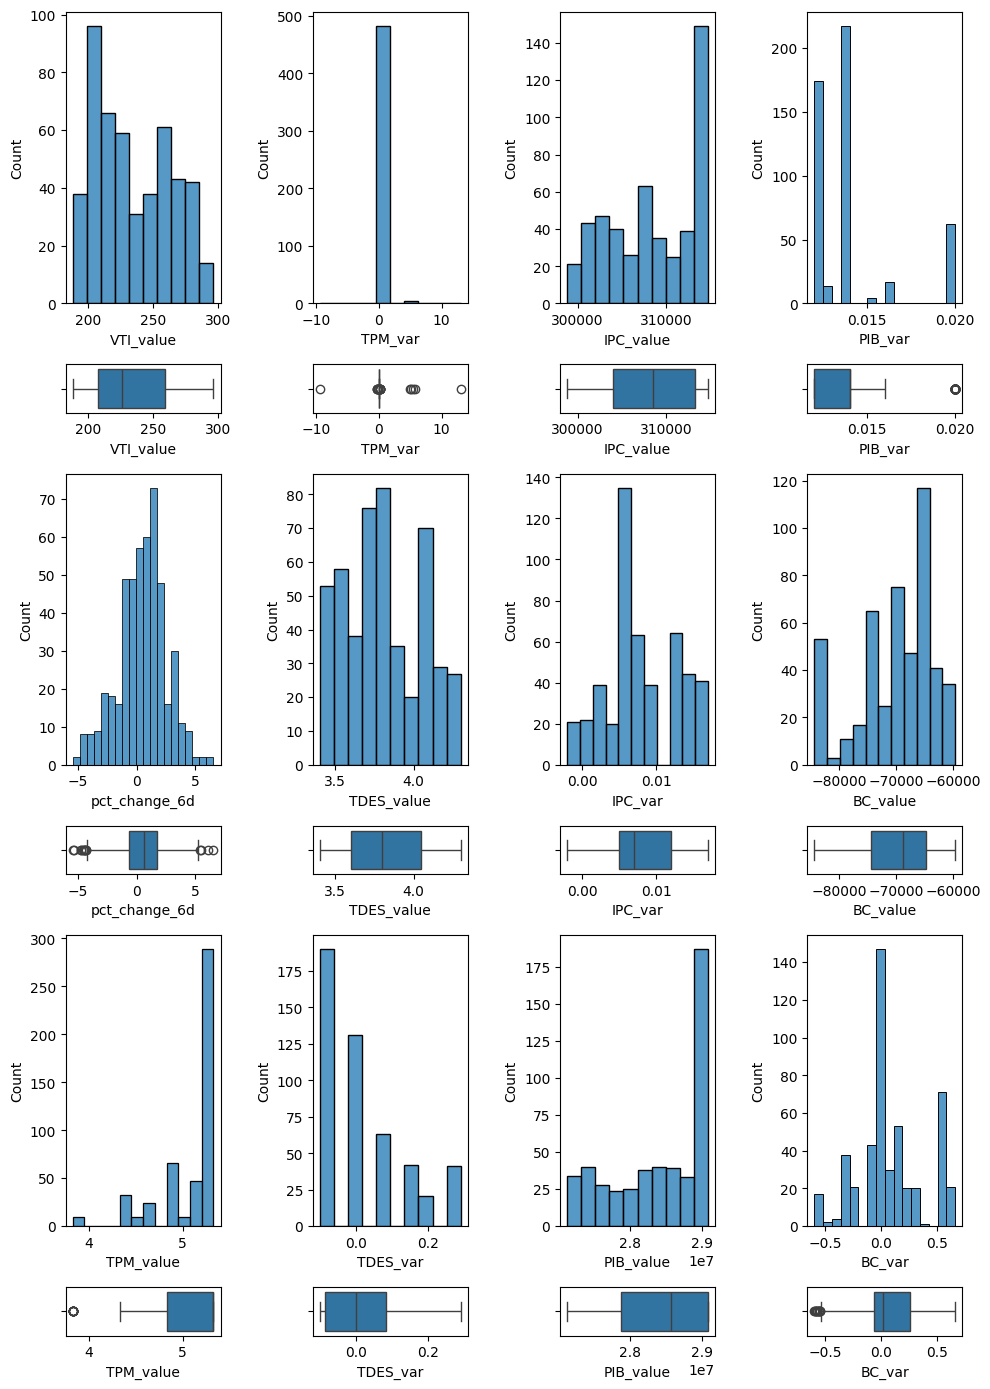

In [44]:
import matplotlib.pyplot as plt 
import seaborn as sns

fig, axis = plt.subplots(6, 4, figsize = (10, 14), gridspec_kw = {"height_ratios": [6, 1, 6, 1,6,1]})

sns.histplot(ax = axis[0,0], data = df_indicadores_D, x = "VTI_value")
sns.boxplot(ax = axis[1,0], data = df_indicadores_D, x = "VTI_value")

sns.histplot(ax = axis[2,0], data = df_indicadores_D, x = "pct_change_6d") #.set_xlim(0, 200)
sns.boxplot(ax = axis[3,0], data = df_indicadores_D, x = "pct_change_6d")

sns.histplot(ax = axis[4,0], data = df_indicadores_D, x = "TPM_value")
sns.boxplot(ax = axis[5,0], data = df_indicadores_D, x = "TPM_value")

sns.histplot(ax = axis[0,1], data = df_indicadores_D, x = "TPM_var")
sns.boxplot(ax = axis[1,1], data = df_indicadores_D, x = "TPM_var")

sns.histplot(ax = axis[2,1], data = df_indicadores_D, x = "TDES_value")
sns.boxplot(ax = axis[3,1], data = df_indicadores_D, x = "TDES_value")

sns.histplot(ax = axis[4,1], data = df_indicadores_D, x = "TDES_var")
sns.boxplot(ax = axis[5,1], data = df_indicadores_D, x = "TDES_var")

sns.histplot(ax = axis[0,2], data = df_indicadores_D, x = "IPC_value")
sns.boxplot(ax = axis[1,2], data = df_indicadores_D, x = "IPC_value")

sns.histplot(ax = axis[2,2], data = df_indicadores_D, x = "IPC_var")
sns.boxplot(ax = axis[3,2], data = df_indicadores_D, x = "IPC_var")

sns.histplot(ax = axis[4,2], data = df_indicadores_D, x = "PIB_value")
sns.boxplot(ax = axis[5,2], data = df_indicadores_D, x = "PIB_value")

sns.histplot(ax = axis[0,3], data = df_indicadores_D, x = "PIB_var")
sns.boxplot(ax = axis[1,3], data = df_indicadores_D, x = "PIB_var")

sns.histplot(ax = axis[2,3], data = df_indicadores_D, x = "BC_value")
sns.boxplot(ax = axis[3,3], data = df_indicadores_D, x = "BC_value")

sns.histplot(ax = axis[4,3], data = df_indicadores_D, x = "BC_var")
sns.boxplot(ax = axis[5,3], data = df_indicadores_D, x = "BC_var")

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


De las variables del dataframe podemos decir que: 
1. La variable de precio del VTI se parece a una normal cargada a la izquierda y su variación porcentual distribuye de forma normal.
2. los cambios porcentuales en general distribuyen de forma normal, a excepción de la TPM (tasa de politica monetaria), el PIB (producto interno bruto) y en el caso de la TDES (tasa de desempleo), la distribución tiende a parecerse a una exponencial decreciente.


In [45]:
#Variables a eliminar
df_indicadores_D = df_indicadores_D.drop(['IPC_value','PIB_value','PIB_var','BC_value','TDES_value','TPM_value'],axis=1)

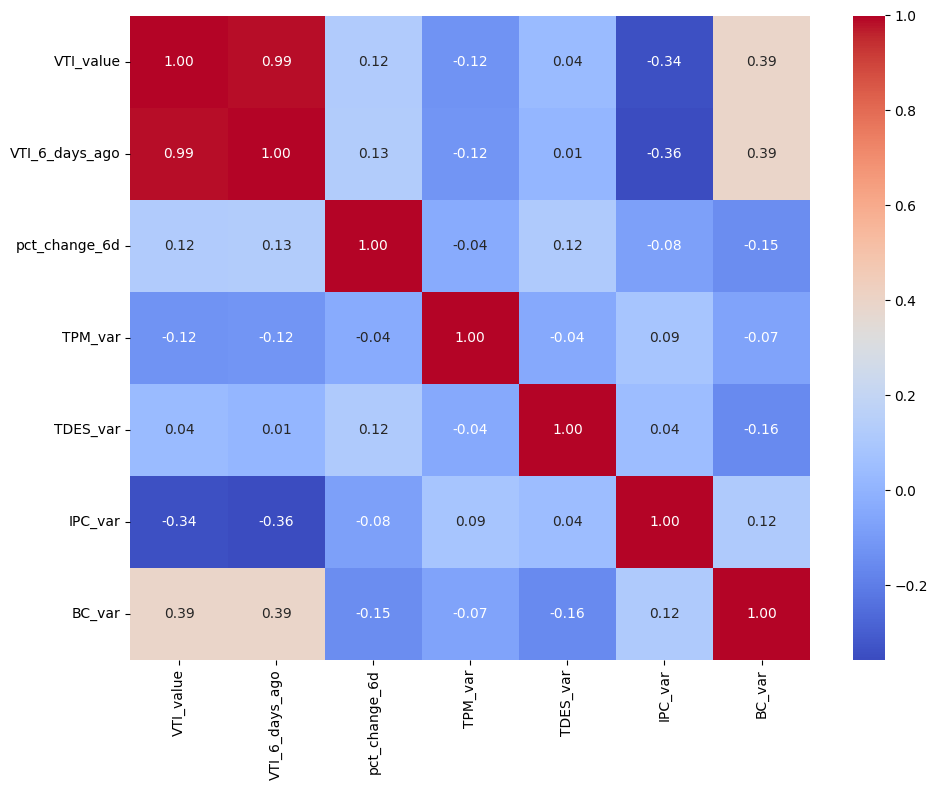

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular la matriz de correlación
matriz_correlacion = df_indicadores_D.corr()

# Ajustar el tamaño de la figura y el formato de los números en el heatmap
plt.figure(figsize=(10, 8))  # Ajusta el tamaño según lo necesites
sns.heatmap(matriz_correlacion, annot=True, fmt=".2f", cmap='coolwarm', annot_kws={"size": 10})

# Mejorar el espaciado
plt.tight_layout()
plt.show()

In [47]:
df_indicadores_D.columns


Index(['VTI_value', 'VTI_6_days_ago', 'pct_change_6d', 'TPM_var', 'TDES_var',
       'IPC_var', 'BC_var'],
      dtype='object')

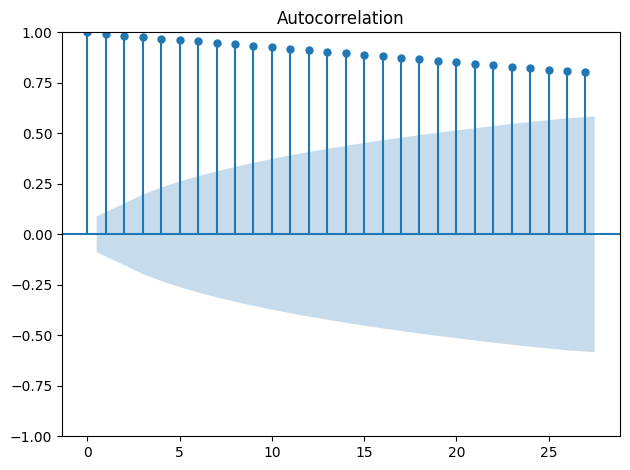

In [48]:
# Autocorrelación
from statsmodels.graphics.tsaplots import plot_acf
df_auto_vti = df_indicadores_D['VTI_value']
plot_acf(df_auto_vti)

plt.tight_layout()

plt.show()

In [49]:
df_indicadores_D = df_indicadores_D.reset_index()
df_indicadores_D.rename(columns={'index': 'date'}, inplace=True)
df_indicadores_D['date'] = pd.to_datetime(df_indicadores_D['date']).dt.date

df_indicadores_D.head(7)

,date,VTI_value,VTI_6_days_ago,pct_change_6d,TPM_var,TDES_var,IPC_var,BC_var
0,2022-12-01,204.18,200.17,0.917570,0.0,-0.095,0.002,0.388
1,2022-12-02,203.99,201.39,0.514075,0.0,-0.092,0.017,-0.037
2,2022-12-05,199.98,201.54,1.623639,0.0,-0.092,0.017,-0.037
3,2022-12-06,196.98,198.27,0.394957,0.0,-0.093,0.017,-0.037
4,2022-12-07,196.66,197.96,-0.231831,0.0,-0.093,0.017,-0.037
5,2022-12-08,198.36,204.06,3.279684,0.0,-0.093,0.017,-0.037
6,2022-12-09,196.70,204.18,2.003297,0.0,-0.093,0.017,-0.037


Modelos de series temporales multivariantes

In [50]:
# Supongamos que tu DataFrame tiene la columna de fechas llamada 'date'
df_indicadores_D = df_indicadores_D.rename(columns={'date': 'ds'})  # Cambia 'date' a 'ds'

# Asegúrate también de que el valor del VTI esté en una columna llamada 'y'
df_indicadores_D = df_indicadores_D.rename(columns={'VTI_value': 'y'})  # Cambia 'VTI_value' a 'y'


In [51]:
df_indicadores_D

,ds,y,VTI_6_days_ago,pct_change_6d,TPM_var,TDES_var,IPC_var,BC_var
0,2022-12-01,204.18,200.17,0.917570,0.0,-0.095,0.002,0.388
1,2022-12-02,203.99,201.39,0.514075,0.0,-0.092,0.017,-0.037
2,2022-12-05,199.98,201.54,1.623639,0.0,-0.092,0.017,-0.037
3,2022-12-06,196.98,198.27,0.394957,0.0,-0.093,0.017,-0.037
4,2022-12-07,196.66,197.96,-0.231831,0.0,-0.093,0.017,-0.037
...,...,...,...,...,...,...,...,...
483,2024-11-04,281.72,285.54,-0.771476,0.0,0.000,0.006,0.522
484,2024-11-05,285.30,286.70,-0.758074,0.0,0.000,0.006,0.522
485,2024-11-06,293.28,287.08,-0.312522,0.0,0.000,0.006,0.522
486,2024-11-07,295.33,286.37,-0.444985,0.0,0.000,0.006,0.522


In [52]:
df_indicadores_D.shape

(488, 8)

In [53]:
# Calcula la diferencia entre fechas para verificar la frecuencia
diffs = df_indicadores_D['ds'].diff().value_counts()
print("Frecuencia de diferencias entre fechas:")
print(diffs)


Frecuencia de diferencias entre fechas:
ds
1 days    382
3 days     86
4 days     15
2 days      4
Name: count, dtype: int64


In [54]:
df_indicadores_D.set_index('ds', inplace=True)

In [55]:
df_indicadores_D = df_indicadores_D.reindex(pd.date_range(start=df_indicadores_D.index.min(), end=df_indicadores_D.index.max(), freq='D'))


In [56]:
df_indicadores_D.fillna(method='ffill', inplace=True)


/var/folders/kx/8g62626j79g8v6fkbl1h0cxm0000gn/T/ipykernel_5497/1915446163.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_indicadores_D.fillna(method='ffill', inplace=True)


In [57]:
df_indicadores_D.reset_index(inplace=True)
df_indicadores_D.rename(columns={'index': 'ds'}, inplace=True)

In [58]:
df_indicadores_D['ds'] = pd.to_datetime(df_indicadores_D['ds'])


In [59]:
# Calcula la diferencia entre fechas para verificar la frecuencia
diffs = df_indicadores_D['ds'].diff().value_counts()
print("Frecuencia de diferencias entre fechas:")
print(diffs)

Frecuencia de diferencias entre fechas:
ds
1 days    708
Name: count, dtype: int64


In [60]:
df_indicadores_D.head()

,ds,y,VTI_6_days_ago,pct_change_6d,TPM_var,TDES_var,IPC_var,BC_var
0,2022-12-01,204.18,200.17,0.917570,0.0,-0.095,0.002,0.388
1,2022-12-02,203.99,201.39,0.514075,0.0,-0.092,0.017,-0.037
2,2022-12-03,203.99,201.39,0.514075,0.0,-0.092,0.017,-0.037
3,2022-12-04,203.99,201.39,0.514075,0.0,-0.092,0.017,-0.037
4,2022-12-05,199.98,201.54,1.623639,0.0,-0.092,0.017,-0.037


In [61]:
df_indicadores_D.shape

(709, 8)

Paso 5: Realiza un EDA completo, dividir el conjunto de datos en train y test

In [62]:
# Divide los datos en conjuntos de entrenamiento y prueba
train_size = int(len(df_indicadores_D) * 0.8)  # 80% entrenamiento, 20% prueba
train_df = df_indicadores_D[:train_size]
test_df = df_indicadores_D[train_size:]

Paso 6: Construye el modelo y optimízalo

Primer modelo Prophet

In [63]:
from prophet import Prophet
m1 = Prophet()
m1.fit(train_df)  
future1 = m1.make_future_dataframe(periods=6)
m1.predict(future1)
# Make future predictions
future1 = m1.make_future_dataframe(periods=6)
forecast1 = m1.predict(future1)

/Users/eleinybellomanzo/Library/Python/3.9/lib/python/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
11:22:29 - cmdstanpy - INFO - Chain [1] start processing
11:22:29 - cmdstanpy - INFO - Chain [1] done processing


In [64]:
forecast1

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2022-12-01,196.962650,192.664088,201.082242,196.962650,196.962650,-0.092782,-0.092782,-0.092782,-0.092782,-0.092782,-0.092782,0.0,0.0,0.0,196.869869
1,2022-12-02,196.867691,192.857700,201.090552,196.867691,196.867691,0.132146,0.132146,0.132146,0.132146,0.132146,0.132146,0.0,0.0,0.0,196.999837
2,2022-12-03,196.772731,192.682607,200.813092,196.772731,196.772731,0.015452,0.015452,0.015452,0.015452,0.015452,0.015452,0.0,0.0,0.0,196.788183
3,2022-12-04,196.677771,192.568971,201.133138,196.677771,196.677771,-0.096628,-0.096628,-0.096628,-0.096628,-0.096628,-0.096628,0.0,0.0,0.0,196.581144
4,2022-12-05,196.582812,192.696808,201.208244,196.582812,196.582812,0.203537,0.203537,0.203537,0.203537,0.203537,0.203537,0.0,0.0,0.0,196.786349
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
568,2024-06-21,263.327124,259.211649,267.831572,263.327124,263.327124,0.132146,0.132146,0.132146,0.132146,0.132146,0.132146,0.0,0.0,0.0,263.459270
569,2024-06-22,263.433211,259.407919,267.952697,263.433211,263.433211,0.015452,0.015452,0.015452,0.015452,0.015452,0.015452,0.0,0.0,0.0,263.448664
570,2024-06-23,263.539298,259.036063,267.839672,263.539298,263.539298,-0.096628,-0.096628,-0.096628,-0.096628,-0.096628,-0.096628,0.0,0.0,0.0,263.442671
571,2024-06-24,263.645385,259.648731,267.756158,263.645385,263.645472,0.203537,0.203537,0.203537,0.203537,0.203537,0.203537,0.0,0.0,0.0,263.848922


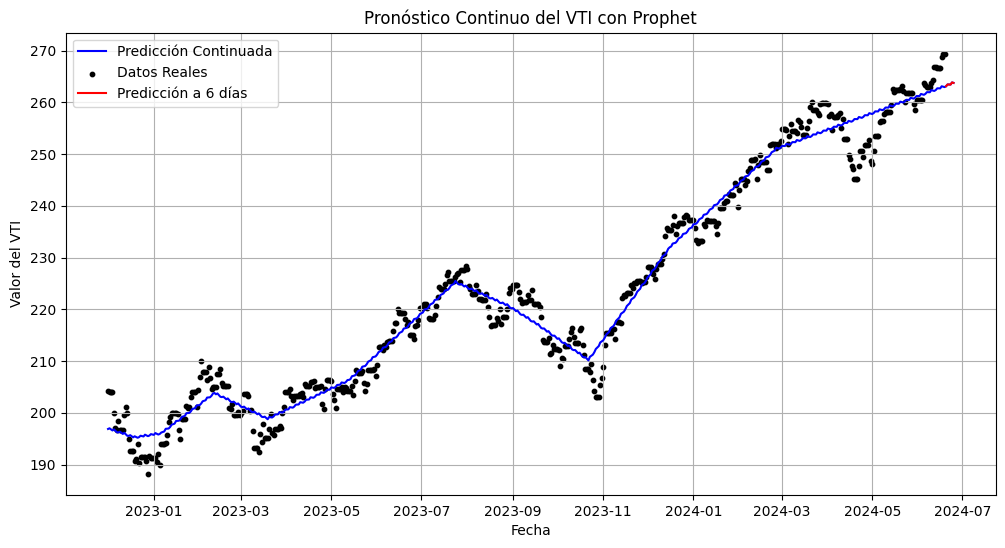

In [65]:
# Filtra los últimos 6 días de predicción
last_6_days_prediction = forecast1.tail(6)

# Visualización mejorada
plt.figure(figsize=(12, 6))

# Línea continua para el histórico y predicción completa
plt.plot(forecast1['ds'], forecast1['yhat'], color='blue', label='Predicción Continuada')
plt.scatter(train_df['ds'], train_df['y'], color='black', marker='o', s=10, label='Datos Reales')

# Línea diferenciada para los últimos 6 días de predicción
plt.plot(last_6_days_prediction['ds'], last_6_days_prediction['yhat'], color='red', label='Predicción a 6 días')

# Títulos y etiquetas
plt.title('Pronóstico Continuo del VTI con Prophet')
plt.xlabel('Fecha')
plt.ylabel('Valor del VTI')
plt.legend()
plt.grid(True)

# Mostrar la gráfica
plt.show()

In [66]:
import pickle
# Guardar el modelo en un archivo .pkl
with open("/Users/eleinybellomanzo/Documents/proyecto ds/proyecto_DataScience_DMS/models/Prophet_default.pkl", "wb") as f:
    pickle.dump(m1, f)

Segundo modelo neuralprophet

In [67]:
from neuralprophet import NeuralProphet


# Configura el modelo de NeuralProphet
m = NeuralProphet()

# Agrega los regresores necesarios
m = m.add_lagged_regressor(names='VTI_6_days_ago')
m = m.add_lagged_regressor(names='pct_change_6d')
m = m.add_lagged_regressor(names='TPM_var')
m = m.add_lagged_regressor(names='TDES_var')
m = m.add_lagged_regressor(names='IPC_var')
m = m.add_lagged_regressor(names='BC_var')

# Asegúrate de que el DataFrame tiene las columnas `ds` y `y`
df_indicadores_D = df_indicadores_D.rename(columns={'date': 'ds', 'VTI_value': 'y'})


# Ajusta el modelo con el conjunto de entrenamiento
metrics = m.fit(train_df, freq="D")

# Genera un DataFrame futuro para realizar predicciones (incluye el conjunto de prueba)
future = m.make_future_dataframe(df_indicadores_D, periods=6, n_historic_predictions=True)

# Realiza la predicción en el conjunto de datos completo para ver el ajuste en el histórico y el futuro
forecast = m.predict(future)

# Divide el DataFrame en histórico y predicción para graficar
actual = forecast[forecast['ds'] < test_df['ds'].iloc[0]]
prediction = forecast[forecast['ds'] >= test_df['ds'].iloc[0]]


Importing plotly failed. Interactive plots will not work.
Importing plotly failed. Interactive plots will not work.
INFO - (NP.forecaster.add_lagged_regressor) - n_lags = 'auto', but there is no lags for Autoregression. Number of lags for regressor is automatically set to 1
INFO - (NP.forecaster.add_lagged_regressor) - n_lags = 'auto', but there is no lags for Autoregression. Number of lags for regressor is automatically set to 1
INFO - (NP.forecaster.add_lagged_regressor) - n_lags = 'auto', but there is no lags for Autoregression. Number of lags for regressor is automatically set to 1
INFO - (NP.forecaster.add_lagged_regressor) - n_lags = 'auto', but there is no lags for Autoregression. Number of lags for regressor is automatically set to 1
INFO - (NP.forecaster.add_lagged_regressor) - n_lags = 'auto', but there is no lags for Autoregression. Number of lags for regressor is automatically set to 1
INFO - (NP.forecaster.add_lagged_regressor) - n_lags = 'auto', but there is no lags for A

Training: |          | 0/? [00:00<?, ?it/s]

WARNING - (NP.config.set_lr_finder_args) - Learning rate finder: The number of batches (18) is too small than the required number                     for the learning rate finder (220). The results might not be optimal.
WARNING - (py.warnings._showwarnmsg) - /Users/eleinybellomanzo/Library/Python/3.9/lib/python/site-packages/pytorch_lightning/utilities/data.py:78: Trying to infer the `batch_size` from an ambiguous collection. The batch size we found is 32. To avoid any miscalculations, use `self.log(..., batch_size=batch_size)`.

WARNING - (py.warnings._showwarnmsg) - /Users/eleinybellomanzo/Library/Python/3.9/lib/python/site-packages/pytorch_lightning/utilities/data.py:78: Trying to infer the `batch_size` from an ambiguous collection. The batch size we found is 22. To avoid any miscalculations, use `self.log(..., batch_size=batch_size)`.

Finding best initial lr: 100%|██████████| 220/220 [00:03<00:00, 72.04it/s]


Training: |          | 0/? [00:30<?, ?it/s, v_num=84, train_loss=0.00285, reg_loss=0.000, MAE=2.760, RMSE=3.510, Loss=0.00286, RegLoss=0.000]

WARNING - (py.warnings._showwarnmsg) - /Users/eleinybellomanzo/Library/Python/3.9/lib/python/site-packages/neuralprophet/df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.859% of the data.
WARNING - (py.warnings._showwarnmsg) - /Users/eleinybellomanzo/Library/Python/3.9/lib/python/site-packages/neuralprophet/df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - /Users/eleinybellomanzo/Library/Python/3.9/lib/python/site-packages/neuralprophet/df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future 


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 18.62it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


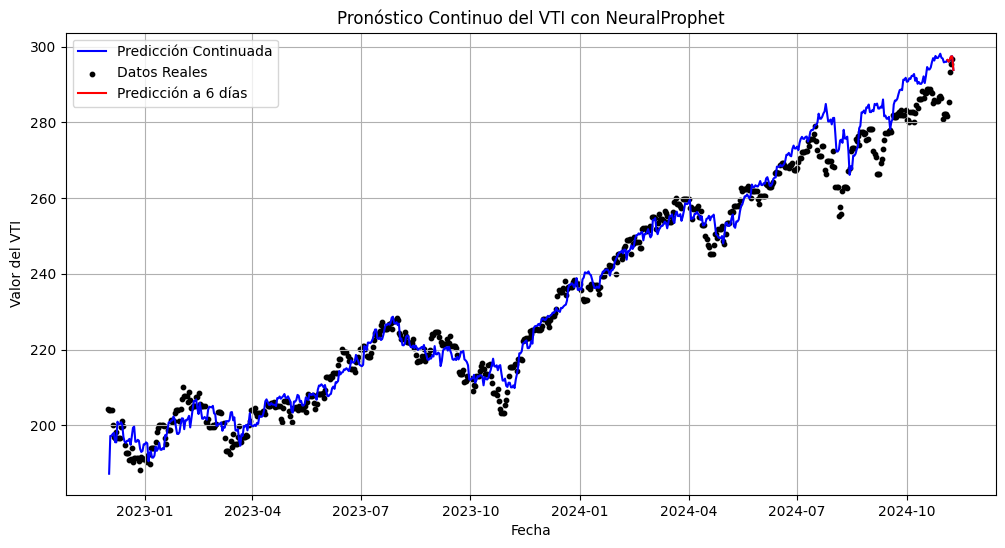

In [68]:
import matplotlib.pyplot as plt
import pandas as pd

# Asegúrate de que las fechas estén en el formato correcto
df_indicadores_D['ds'] = pd.to_datetime(df_indicadores_D['ds'])
forecast['ds'] = pd.to_datetime(forecast['ds'])

# Combina los datos históricos y predicciones en un solo DataFrame para una línea continua
combined_df = pd.concat([actual, prediction])

# Filtra los últimos 6 días de predicción
last_6_days_prediction = prediction.tail(6)

# Visualización mejorada
plt.figure(figsize=(12, 6))
# Línea continua para el histórico y predicción completa
plt.plot(combined_df['ds'], combined_df['yhat1'], color='blue', label='Predicción Continuada')
plt.scatter(combined_df['ds'], combined_df['y'], color='black', marker='o', s=10, label='Datos Reales')
# Línea diferenciada para los últimos 6 días de predicción
plt.plot(last_6_days_prediction['ds'], last_6_days_prediction['yhat1'], color='red', label='Predicción a 6 días')

# Títulos y etiquetas
plt.title('Pronóstico Continuo del VTI con NeuralProphet')
plt.xlabel('Fecha')
plt.ylabel('Valor del VTI')
plt.legend()
plt.grid(True)

# Mostrar la gráfica
plt.show()



In [69]:
train_df.to_csv("../data/processed/train.csv", index = False)
test_df.to_csv("../data/processed/test.csv", index = False)

In [70]:
from sklearn.metrics import mean_squared_error
import math

# Asegurarse de que la columna 'ds' esté en formato datetime en ambos DataFrames
df_indicadores_D['ds'] = pd.to_datetime(df_indicadores_D['ds'])
forecast['ds'] = pd.to_datetime(forecast['ds'])

# Fusiona los DataFrames en la columna 'ds'
df_results = pd.merge(df_indicadores_D[['ds', 'y']], forecast[['ds', 'yhat1']], on='ds')

# Filtrar el conjunto de prueba
test_results = df_results[df_results['ds'] >= test_df['ds'].iloc[0]]

# Elimina filas con valores NaN en 'y' o 'yhat1' en el conjunto de prueba
test_results = test_results.dropna(subset=['y', 'yhat1'])

# Calcula el RMSE en el conjunto de prueba
rmse = math.sqrt(mean_squared_error(test_results['y'], test_results['yhat1']))

print('RMSE en el conjunto de prueba:', rmse)

#las predicciones del modelo están desviadas de los valores reales del VTI en aproximadamente 5.85 unidades

RMSE en el conjunto de prueba: 8.827873688749063


In [71]:
guardar_csv(df_indicadores_D,"../data/processed/total_data.csv")

In [72]:
import pickle
# Guardar el modelo en un archivo .pkl
with open("/Users/eleinybellomanzo/Documents/proyecto ds/proyecto_DataScience_DMS/models/NeuralProphet_default.pkl", "wb") as f:
    pickle.dump(m, f)